# EDA du fichier horaire travail

Ce notebook a pour objectif d'analyser les données d'horaires de travail collectées 
via les badgeuses de l'entreprise HumanForYou sur l'année 2015. 

L'analyse se concentre sur :
- L'extraction et le chargement des données
- L'identification des valeurs manquantes
- La visualisation des patterns de données incomplètes
- L'évaluation de la qualité des données pour la modélisation

Pour pouvoir mener à bien cette analyse, nous allons devoir effectuer des imports 
de différentes bibliothèques Python essentielles :
- pandas : pour la manipulation et l'analyse des données tabulaires
- numpy : pour les calculs numériques et la gestion des valeurs manquantes
- matplotlib & seaborn : pour la création de visualisations graphiques
- zipfile & os : pour la gestion et l'extraction des fichiers compressés
- datetime : pour le traitement des données temporelles

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tarfile
import zipfile
import os
from datetime import datetime

# Configuring display settings
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings("ignore", category=FutureWarning)

# Extraction des données du fichier zip

Le fichier in_out_time.zip contient les données de badgeuse pour l'ensemble des 
employés sur l'année 2015. Nous devons d'abord extraire le contenu de cette archive 
compressée pour accéder aux fichiers CSV qu'elle contient.

Cette étape permet de :
- Créer un dossier dédié pour les fichiers extraits
- Décompresser l'archive ZIP de manière programmatique
- Lister les fichiers disponibles pour l'analyse

In [45]:
zip_path = 'Data/in_out_time.zip'
extract_folder = 'in_out_time_data'

# Créer le dossier d'extraction s'il n'existe pas
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extraire le contenu du ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    print(f"Extraction réussie dans '{extract_folder}/'")
    
# Lister les fichiers extraits
files_in_zip = os.listdir(extract_folder)
print(f"\nFichiers trouvés : {files_in_zip}")

Extraction réussie dans 'in_out_time_data/'

Fichiers trouvés : ['in_time.csv', 'out_time.csv']


# Chargement des données

Une fois les fichiers extraits, nous procédons au chargement des données dans des 
DataFrames pandas. Cette étape nous permet de :
- Identifier tous les fichiers CSV présents dans le zip
- Charger chaque fichier individuellement
- Combiner les données si plusieurs fichiers sont présents
- Obtenir un aperçu de la structure des données (dimensions, colonnes)

Cette phase est cruciale car elle détermine la qualité et la complétude des données 
que nous allons analyser par la suite.

In [66]:
# Trouver les fichiers CSV dans le dossier extrait
csv_files = [f for f in files_in_zip if f.endswith('.csv')]
print(f"Fichiers CSV détectés : {csv_files}\n")

# Charger les fichiers séparément
df_in_time = pd.read_csv(os.path.join(extract_folder, 'in_time.csv'))
df_out_time = pd.read_csv(os.path.join(extract_folder, 'out_time.csv'))


Fichiers CSV détectés : ['in_time.csv', 'out_time.csv']



Analyse des données du fichier `in_time.csv`

In [68]:
# print("\nPremières lignes (5 employés, 6 premières colonnes) :")
# display(df_in_time.iloc[:5, :6])

# Information général
df_in_time.info()

# Statistique descriptive
df_in_time.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


,Unnamed: 0,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
count,4410.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,2205.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1273.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1103.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2205.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3307.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4410.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analyse des données du fichier `out_time.csv`

In [69]:
# print("\nPremières lignes (5 employés, 6 premières colonnes) :")
# display(df_out_time.iloc[:5, :6])

# Information général
df_out_time.info()

# Statistique descriptive
df_out_time.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


,Unnamed: 0,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
count,4410.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,2205.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1273.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1103.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2205.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3307.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4410.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous pouvons voir qu'il y a deux fichiers, ainsi que leurs dimensions. <br>
En appliquant `.info()` nous pouvons voir que nous avons : **float64(12), int64(1) et object(249)**

### Puis nous avons concaténiser les données

In [65]:
# # Trouver les fichiers CSV dans le dossier extrait
# csv_files = [f for f in files_in_zip if f.endswith('.csv')]
# print(f"Fichiers CSV détectés : {csv_files}")

# # Charger tous les fichiers CSV (supposons qu'il y en a plusieurs)
# dataframes = {}
# for csv_file in csv_files:
#     file_path = os.path.join(extract_folder, csv_file)
#     df = pd.read_csv(file_path)
#     dataframes[csv_file] = df  

# # Si un seul fichier, le charger directement
# if len(csv_files) == 1:
#     df_horaires = dataframes[csv_files[0]]
# else:
#     # Sinon, concaténer tous les fichiers
#     df_horaires = pd.concat(dataframes.values(), ignore_index=True)

# Exploration initale des données

Avant d'analyser les valeurs manquantes, il est essentiel de comprendre la structure 
générale du dataset. Cette exploration préliminaire nous permet de :
- Visualiser les premières et dernières lignes du dataset
- Identifier les types de données de chaque colonne
- Obtenir des statistiques descriptives de base
- Repérer d'éventuelles anomalies évidentes

Cette étape nous donne une vision globale de la qualité des données avant d'approfondir 
l'analyse des valeurs manquantes.

### Prise en main des données

Avant de continuer, il est important de voir les détails des données

In [ ]:
# Information général des données
# df_horaires.info()

# Pour plus d'information : 
# Les premières lignes
# df_horaires.head(10)

# Les dernières lignes :
# df_horaires.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 17.6+ MB


In [ ]:
# Statistiques descriptives des données
# df_horaires.describe()

,Unnamed: 0,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
count,8820.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,2205.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1273.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1103.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2205.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3308.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4410.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyse et Visualisation des valeurs manquantes

L'identification des valeurs manquantes est une étape critique de l'EDA, 
particulièrement importante pour un projet éthique et rigoureux. 

Nous calculons ici :
- Le nombre absolu de valeurs manquantes par colonne
- Le pourcentage de données manquantes par rapport au total
- Un classement des colonnes par ordre décroissant de valeurs manquantes

Cette analyse quantitative nous permettra de décider des stratégies d'imputation 
ou de suppression à adopter, tout en documentant ces choix dans le livrable éthique.

## Nous avons analysé les valeurs manquantes pour les fichiers séparément

Dans le fichier `in_time.csv` nous avons :

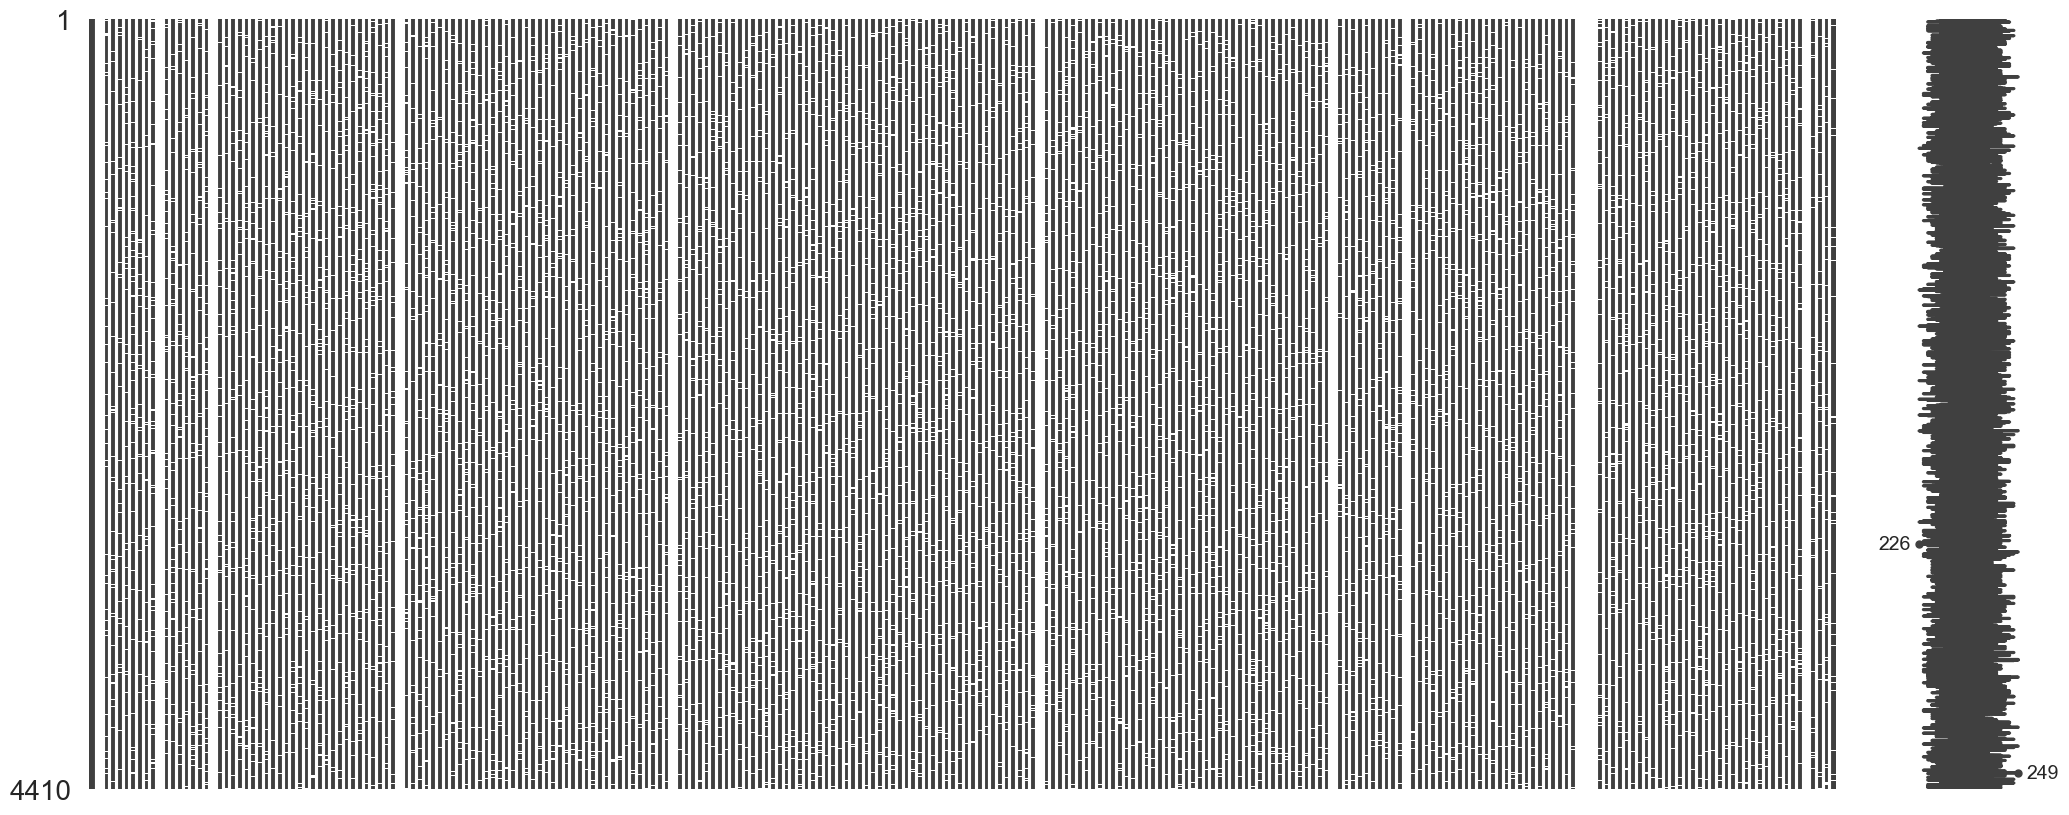

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [60]:
import missingno as msno

# Visualize missing data
msno.matrix(df_in_time)
plt.show()

# Sélectionne toutes les colonnes qui sont des nombres (float ou int). .columns récupère juste les noms des colonnes.
numerical_columns = df_in_time.select_dtypes(include=['float64', 'int64']).columns

# Sélectionne toutes les colonnes textes/catégories (object). .columns récupère juste les noms des colonnes.
categorical_columns = df_in_time.select_dtypes(include=['object']).columns

# Verify that there are no more missing values
df_in_time.isnull().sum()

Dans le fichier `out_time.csv` nous avons :

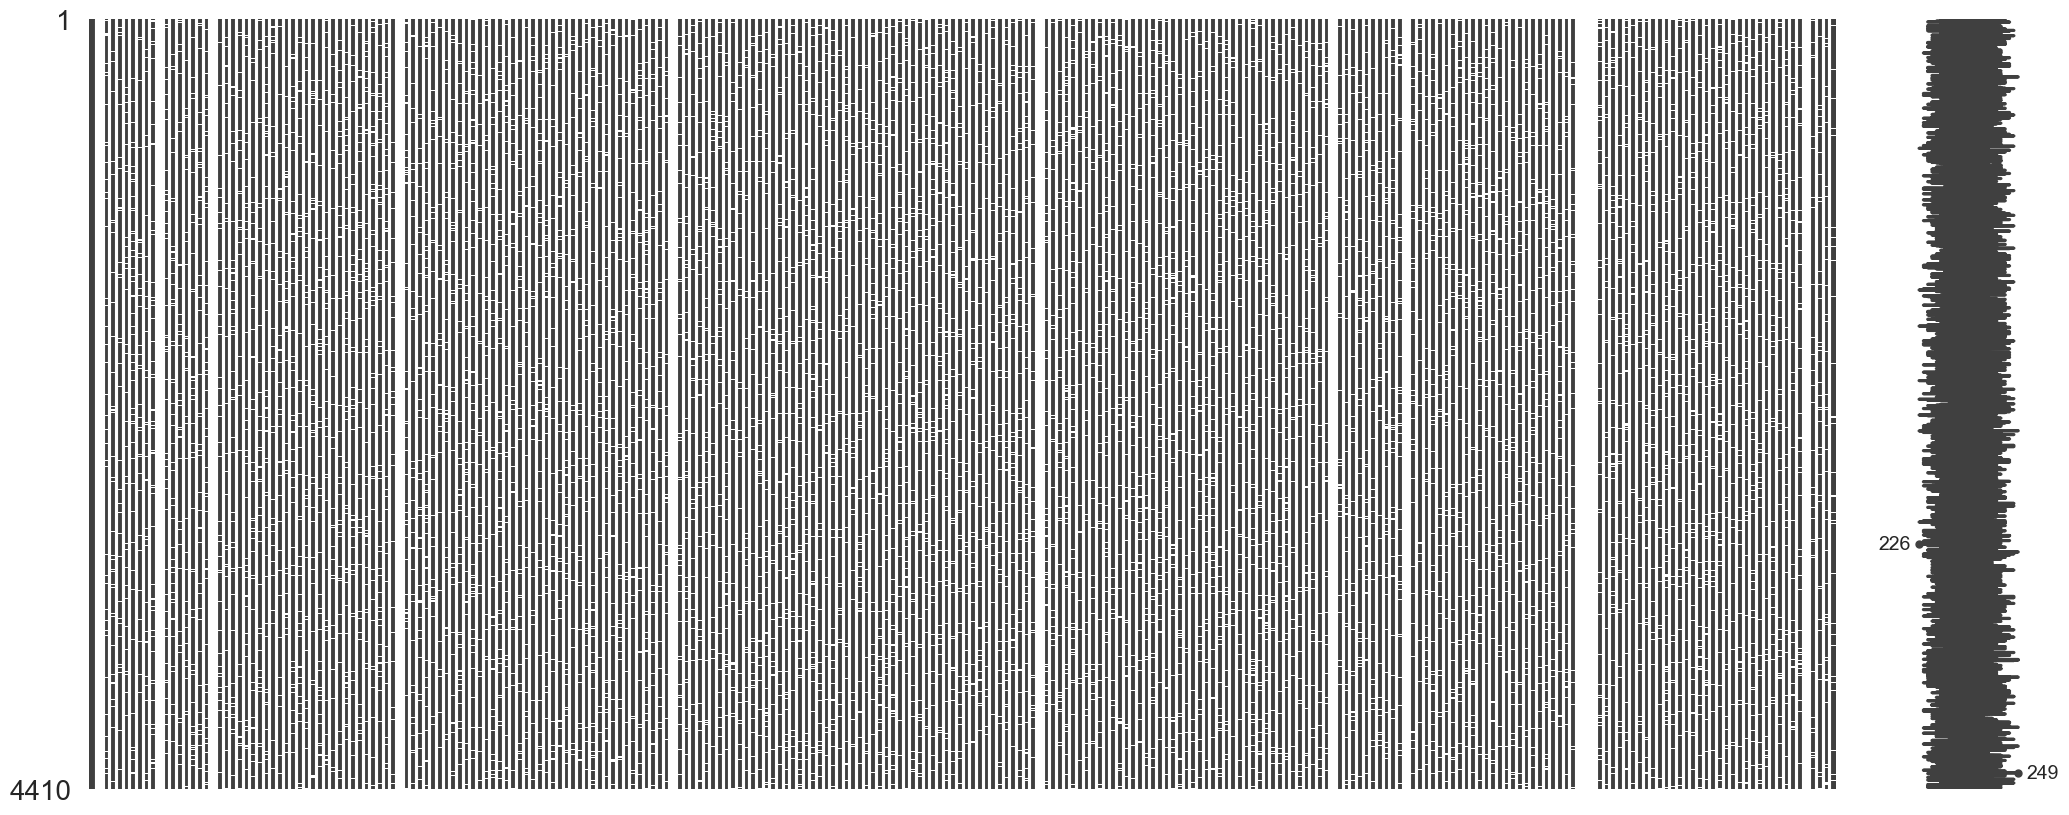

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [61]:
import missingno as msno

# Visualize missing data
msno.matrix(df_out_time)
plt.show()

# Sélectionne toutes les colonnes qui sont des nombres (float ou int). .columns récupère juste les noms des colonnes.
numerical_columns = df_out_time.select_dtypes(include=['float64', 'int64']).columns

# Sélectionne toutes les colonnes textes/catégories (object). .columns récupère juste les noms des colonnes.
categorical_columns = df_out_time.select_dtypes(include=['object']).columns

# Verify that there are no more missing values
df_out_time.isnull().sum()

In [64]:
# import missingno as msno

# # Visualize missing data
# msno.matrix(df_horaires)
# plt.show()

# # Sélectionne toutes les colonnes qui sont des nombres (float ou int). .columns récupère juste les noms des colonnes.
# numerical_columns = df_horaires.select_dtypes(include=['float64', 'int64']).columns

# # Sélectionne toutes les colonnes textes/catégories (object). .columns récupère juste les noms des colonnes.
# categorical_columns = df_horaires.select_dtypes(include=['object']).columns

# # Verify that there are no more missing values
# df_horaires.isnull().sum()

# Création de Feature

Rappel de l’objectif final : prédire l’attrition des employés (Attrition = Yes / No). <br>

Une feature est une information agrégée ou transformée décrivant le comportement d’un employé et utilisée comme variable explicative par le modèle. <br>

Ces features permettront d’analyser si les comportements d’absence et de badgeage corrèlent avec l’attrition des employés, tout en respectant la confidentialité des données :

- Données agrégées par employé
- Aucune exploitation des horaires individuels

À partir des données de badgeuse (in_time et out_time), nous avons créé trois features agrégées par employé afin d'avoir les comportements liés à la présence au travail.<br>
Nous avons décidé de créer les features suivantes : 

### 1. `nb_jours_absents`

**Description**<br>

Nombre de jours où l’employé était absent, identifié par des valeurs manquantes (NA) dans les données de badgeage.

**Interprétation métier** <br>
Cette variable regroupe :

-  Congés
- Arrêts maladie
- Autres absences (justifiées ou non)

Elle permet d’identifier les employés avec une fréquence d’absence élevée.


**Exemple pour la compréhension**

Employé 1 : 29 jours absents sur 261 jours <br>
Employé 9 : 31 jours absents


**Qu'elle est l'utilité pour prédire l'attrition ?**<br>
Un employé souvent absent → peut-être démotivé → risque de partir ? <br>
Ou alors congés normaux → pas de risque

Le modèle va apprendre à distinguer ces deux cas en croisant avec d'autres variables (satisfaction, salaire, etc.)

### 2. `taux_absence`

**Description**<br>

Pourcentage de jours d’absence sur l’année 2015 par employé. Pourcentage de jours absents (= nb_jours_absents / total_jours × 100)

**Exemple pour la compréhension**

Employé 1 : 11.11% d'absence <br>
Employé 9 : 11.88% d'absence

**Qu'elle est l'utilité pour prédire l'attrition ?**<br>
Taux d'absence élevé (>30%) → signal d'alarme potentiel <br>
Le modèle peut apprendre : "Si taux_absence > 20% ET satisfaction < 2 → Attrition = Yes"

### 3. `nb_oublis_badgeage`

**Description**<br>

Nombre d’incohérences de badgeage, correspondant aux cas où :
- l’employé badge à l’arrivée mais pas au départ
- l’employé badge au départ mais pas à l’arrivée

**Interprétation métier** <br>

Cette variable peut être un indicateur de :
- Désorganisation, le fait d'être pressé
- Peut-être un manque d’engagement

Elle permet d’identifier les oublies de badgeage.

**Qu'elle est l'utilité pour prédire l'attrition ?**<br>
Oublis fréquents → désorganisation, désengagement ?<br>
Peut être un indicateur indirect de démotivation

In [76]:
# Récupérer les colonnes de dates
date_cols = df_in_time.columns[1:]  # Toutes les colonnes sauf EmployeeID
total_jours = len(date_cols)

# Créer un nouveau DataFrame avec les features
df_features_horaires = pd.DataFrame()
df_features_horaires['EmployeeID'] = df_in_time.iloc[:, 0]

# Feature 1 : Nombre de jours absents
# On utilise in_time (arrivée) comme référence - si absent le matin, absent toute la journée
df_features_horaires['nb_jours_absents'] = df_in_time[date_cols].isnull().sum(axis=1)

# Feature 2 : Taux d'absence (en %) - arrondi à 2 décimales
df_features_horaires['taux_absence'] = ((df_features_horaires['nb_jours_absents'] / total_jours) * 100).round(2)

# Feature 3 : Incohérences de badgeage
# Cas 1 : Badgé à l'arrivée mais PAS au départ (oubli de badger en partant)
oubli_sortie = (df_in_time[date_cols].notna() & df_out_time[date_cols].isna()).sum(axis=1)

# Cas 2 : PAS badgé à l'arrivée mais badgé au départ (oubli de badger en arrivant)
oubli_entree = (df_in_time[date_cols].isna() & df_out_time[date_cols].notna()).sum(axis=1)

# Total des oublis badgeage
df_features_horaires['nb_oublis_badgeage'] = oubli_sortie + oubli_entree

# Affichage
print("\nAperçu des features créées :")
display(df_features_horaires.head(10))

print("\nStatistiques descriptives :")
display(df_features_horaires.describe())

print(f"\nObservations :")
print(f"   • Nombre de jours suivis : {total_jours}")
print(f"   • Taux d'absence moyen : {df_features_horaires['taux_absence'].mean():.2f}%")
print(f"   • Absence minimale : {df_features_horaires['nb_jours_absents'].min()} jours ({df_features_horaires['taux_absence'].min()}%)")
print(f"   • Absence maximale : {df_features_horaires['nb_jours_absents'].max()} jours ({df_features_horaires['taux_absence'].max()}%)")
print(f"   • Employés avec >20% d'absence : {(df_features_horaires['taux_absence'] > 20).sum()}")
print(f"   • Employés avec oublis fréquents (>10) : {(df_features_horaires['nb_oublis_badgeage'] > 10).sum()}")


Aperçu des features créées :


,EmployeeID,nb_jours_absents,taux_absence,nb_oublis_badgeage
0,1,29,11.11,0
1,2,25,9.58,0
2,3,19,7.28,0
3,4,26,9.96,0
4,5,16,6.13,0
5,6,24,9.20,0
6,7,29,11.11,0
7,8,18,6.90,0
8,9,31,11.88,0
9,10,27,10.34,0



Statistiques descriptives :


,EmployeeID,nb_jours_absents,taux_absence,nb_oublis_badgeage
count,4410.00,4410.00,4410.00,4410.00
mean,2205.50,24.73,9.48,0.00
std,1273.20,5.50,2.11,0.00
min,1.00,13.00,4.98,0.00
25%,1103.25,20.00,7.66,0.00
50%,2205.50,25.00,9.58,0.00
75%,3307.75,29.00,11.11,0.00
max,4410.00,36.00,13.79,0.00



Observations :
   • Nombre de jours suivis : 261
   • Taux d'absence moyen : 9.48%
   • Absence minimale : 13 jours (4.98%)
   • Absence maximale : 36 jours (13.79%)
   • Employés avec >20% d'absence : 0
   • Employés avec oublis fréquents (>10) : 0


# Sauvegarde du fichier au propre

In [77]:
# Nom du dossier
folder = "Data_cleaned"

# Créer le dossier s'il n'existe pas
os.makedirs(folder, exist_ok=True)

# Sauvegarder le DataFrame dans ce dossier
df_features_horaires.to_csv(f"{folder}/features_horaires_travail.csv", index=False)
print(f"\nFeatures sauvegardées dans '{folder}'")


Features sauvegardées dans 'Data_cleaned'
